In [2]:
import pandas as pd
import numpy as np

# Creating Array of files
files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]

# Creating a dictionary by reading all of the data files under data folder
data = {}
for f in files:
    d = pd.read_csv("data/{0}".format(f))
    data[f.replace(".csv","")] = d

In [3]:
#Printing first 5 lines of each DataFrame
for k,v in data.items():
    print ("\n===========\n" + k + "\n=============\n")
    print (v.head())


graduation

    Demographic     DBN                            School Name    Cohort  \
0  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2003   
1  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2004   
2  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2005   
3  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2006   
4  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL  2006 Aug   

  Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
0            5               s                         s                 s   
1           55              37                     67.3%                17   
2           64              43                     67.2%                27   
3           78              43                     55.1%                36   
4           78              44                     56.4%                37   

  Total Regents - % of cohort Total Regents - % of grads  \
0

In [5]:
#Printing of all columns
for k,v in data.items():
    print ("\n==========\n" + k + "\n===========\n")
    print (v.shape)
    print (v.columns)


graduation

(25096, 23)
Index(['Demographic', 'DBN', 'School Name', 'Cohort', 'Total Cohort',
       'Total Grads - n', 'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort'],
      dtype='object')

hs_directory

(435, 58)
Index(['dbn', 'school_name', 'boro', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'zip', 'website', 'total_students', 'campus_name',
       'sch

In [ ]:
#Unique ID to join all tables in DBN Field . But in class_size we don't have that field.'

In [7]:
data['ap_2010']['DBN'].head()

0    01M448
1    01M450
2    01M515
3    01M539
4    02M296
Name: DBN, dtype: object

In [8]:
data['demographics']['DBN'].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

In [9]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN


In [ ]:
#DBN = CSD + borough + School code 

In [10]:
data['class_size']['DBN']=data['class_size'].apply(lambda x: "{0:02d}{1}".format(x['CSD'],x['SCHOOL CODE']),axis=1)

In [11]:
#Below format will help us to display single digit with leading zeros.
# 0:04 will have numbe wil leading zeros and total 4 digits,  0005

print ("{0:02d}".format(5))

05


In [12]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [ ]:
#As we can see above, we see multiple rows for the same school in class_size DataFrame


In [16]:
# To have a primary index column between DataFrames we should rename dbn column
data['hs_directory'].rename(columns={'dbn':'DBN'},inplace=True)

In [17]:
data['hs_directory'].head(2)

,DBN,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."


In [18]:
#To add surveys to the existing data
survey1 = pd.read_csv("data/survey_all.txt", delimiter="\t", encoding='windows-1252')
survey2 = pd.read_csv("data/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey1['d75'],survey2['d75'] = False,True
survey = pd.concat([survey1, survey2], axis =0)

In [26]:
survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_10,aca_t_11,saf_f_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,saf_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,NaN,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,8.0
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,NaN,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.5
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,NaN,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.2
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,NaN,7.8,NaN,5.9,6.5,7.4,7.3,6.7,7.1,7.3
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,NaN,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.5


In [27]:
# to reduce columns based on the data dictionary provided

survey['DBN'] = survey['dbn']
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:, survey_fields]
survey.shape

(1702, 23)

In [28]:
data['survey'] = survey

In [29]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [30]:
#values are duplicated

data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [31]:
#Checking whether we have muptiple rows with same school (DBN)
temp = data['sat_results']['DBN'].value_counts()
temp[temp>1].count()

0

In [33]:
temp=data['class_size']['DBN'].value_counts()
temp[temp>1].count()

1487

In [37]:
#Sample school with multiple records in class_size dataframe

data['class_size'][data['class_size']['DBN'] == '01M015']

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN,01M015
5,1,M,M015,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12,1.0,12.0,12.0,12.0,ATS,NaN,01M015
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN,01M015
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26,2.0,13.0,12.0,14.0,ATS,NaN,01M015
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27,1.0,27.0,27.0,27.0,ATS,NaN,01M015


In [38]:
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')

In [40]:
# As we can see grade has an extra space we can again use lambda function to trim it

data['class_size'].rename(columns = lambda x: x.strip(), inplace=True)
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE', 'PROGRAM TYPE',
       'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')

In [41]:
data['class_size']['GRADE'].value_counts()

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE, dtype: int64

In [42]:
data['class_size']['GRADE'].value_counts(normalize=True)

09-12      0.407395
MS Core    0.182264
0K-09      0.052972
0K         0.047346
01         0.045355
02         0.044666
03         0.043748
04         0.043633
05         0.041566
06         0.032380
07         0.029778
08         0.028132
09         0.000765
Name: GRADE, dtype: float64

In [43]:
data['class_size']['PROGRAM TYPE'].value_counts(normalize=True)

GEN ED     0.556704
CTT        0.285528
SPEC ED    0.139817
G&T        0.017951
Name: PROGRAM TYPE, dtype: float64

In [44]:
# We can see that mostly grade acquired by students is 09-12 and most of the program is GEN ED
# so we select only these

#Only select values from class_size where the GRADE field is 09-12.
#Only select values from class_size where the PROGRAM TYPE field is GEN ED.
#Group the class_size dataset by DBN, and take the average of each column. Essentially, we’ll find the average class_size values for each school.
#Reset the index, so DBN is added back in as a column.


class_size = data['class_size']
class_size = class_size[class_size['GRADE'] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size = class_size.groupby('DBN').agg(np.mean)


In [45]:
class_size.head()

,CSD,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,
01M292,1,4.000000,22.564286,18.50,26.571429,NaN
01M332,1,2.000000,22.000000,21.00,23.500000,NaN
01M378,1,1.000000,33.000000,33.00,33.000000,NaN
01M448,1,4.750000,22.231250,18.25,27.062500,NaN
01M450,1,2.733333,21.200000,19.40,22.866667,NaN


In [46]:
class_size.reset_index(inplace=True)
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,2.733333,21.200000,19.40,22.866667,NaN


In [47]:
# When we check the number of duplicate rows after operations, we see that there are no schools with multiple records.
temp = data['class_size']['DBN'].value_counts()
temp[temp > 1].count()

0

In [48]:
# We also have duplicate rows in demographics DataFrame as well, but let's have look which causes duplicity
temp = data['demographics']['DBN'].value_counts()
temp[temp > 1].count()

1555

In [49]:
# As we see in here, for each year, we have a record for a school.
data['demographics'][data['demographics']['DBN'] == '01M015']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7


In [51]:
data['demographics']['schoolyear'].value_counts(normalize=True)

20112012    0.149777
20102011    0.148685
20092010    0.146402
20082009    0.143027
20072008    0.139950
20062007    0.137568
20052006    0.134591
Name: schoolyear, dtype: float64

In [52]:
data['demographics']=data['demographics'][data['demographics']['schoolyear'] == 20112012]


In [53]:
# After we filter for only 1 year, we see no duplicates in our DataFrame
temp = data['demographics']['DBN'].value_counts()
temp[temp > 1].count()

0

In [54]:
# We also have Grade and Year breakdowns in this DataFrame
data['math_test_results'].head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [56]:
data['math_test_results']=data['math_test_results'][(data['math_test_results']['Year'] == 2011) & (data['math_test_results']['Grade'] == '8')]

In [57]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [58]:
data['graduation']['Demographic'].value_counts()


Total Cohort                   2493
Special Education Students     2471
English Proficient Students    2471
General Education Students     2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64

In [59]:
data['graduation']['Cohort'].value_counts()


2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

In [60]:
data['graduation'] = data['graduation'][(data['graduation']['Cohort'] == "2006") & (data['graduation']['Demographic'] == 'Total Cohort')]


In [61]:
# After we filter for only 1 year, we see no duplicates in our DataFrame
temp = data['graduation']['DBN'].value_counts()
temp[temp > 1].count()

0

In [62]:
# Now data Cleaning Part is done

# Now variables will be computed based on statistics

data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [64]:
cols = data['sat_results'].columns[3:]
data['sat_results'][cols]=data['sat_results'][cols].apply(pd.to_numeric , errors='coerce')

In [65]:
data['sat_results'].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0


In [66]:
data['sat_results']['sat_score'] = data['sat_results'][cols].sum(axis=1)

In [67]:
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

In [68]:
data['hs_directory']['Location 1'][0].split("\n")[-1][1:-1].split(", ")

['40.67029890700047', '-73.96164787599963']

In [69]:
data['hs_directory']['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1][1:-1].split(", ")[0])
data['hs_directory']['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1][1:-1].split(", ")[1])

In [70]:
locations = ['lat','lon']

In [71]:
data['hs_directory'][locations].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
lat    435 non-null object
lon    435 non-null object
dtypes: object(2)
memory usage: 6.9+ KB


In [72]:
for c in locations :
    data['hs_directory'][c] = data['hs_directory'][c].apply(pd.to_numeric , errors='coerec')

In [73]:
data['hs_directory'][locations].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
lat    435 non-null float64
lon    435 non-null float64
dtypes: float64(2)
memory usage: 6.9 KB


In [74]:
#Combining Data Sets

#Showing all of the data frame names

[k for k,v in data.items()]

['graduation',
 'hs_directory',
 'math_test_results',
 'class_size',
 'ap_2010',
 'sat_results',
 'survey',
 'demographics']

In [76]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]

In [77]:
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)

full.shape

hs_directory
0
math_test_results
0
class_size
0
ap_2010
1
sat_results
0
survey
0
demographics
0


(448, 157)

In [78]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']


In [79]:
full[cols].sample(10)


,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
389,NaN,NaN,NaN
401,NaN,NaN,NaN
230,133,193,18
444,NaN,NaN,NaN
390,NaN,NaN,NaN
370,NaN,NaN,NaN
200,106,130,13
13,25,37,15
196,NaN,NaN,NaN
108,26,36,s


In [80]:
full[cols] = full[cols].apply(pd.to_numeric, errors='coerce')
full[cols] = full[cols].fillna(value=0)

In [81]:

full[cols].sample(10)

,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
419,0.0,0.0,0.0
379,0.0,0.0,0.0
171,0.0,0.0,0.0
244,95.0,137.0,40.0
60,41.0,55.0,29.0
178,0.0,0.0,0.0
320,6.0,6.0,0.0
5,0.0,0.0,0.0
209,0.0,0.0,0.0
225,357.0,576.0,331.0


In [82]:
full['school_dist'] = full['DBN'].apply(lambda x: x[:2])

In [83]:
full = full.fillna(full.mean())


In [84]:
# Computing Correlations

full.corr()['sat_score'].sort_values(ascending=False)


sat_score                               1.000000
SAT Writing Avg. Score                  0.982133
SAT Critical Reading Avg. Score         0.976932
SAT Math Avg. Score                     0.956373
AVERAGE CLASS SIZE                      0.416037
NUMBER OF SECTIONS                      0.369259
SIZE OF LARGEST CLASS                   0.350813
N_s                                     0.335094
AP Test Takers                          0.320282
N_p                                     0.316607
Total Exams Taken                       0.305729
Number of Exams with scores 3 4 or 5    0.304725
total_enrollment                        0.299207
female_num                              0.297774
white_per                               0.297704
asian_num                               0.283949
male_num                                0.281977
N_t                                     0.280952
SIZE OF SMALLEST CLASS                  0.272925
white_num                               0.270019
asian_per           

In [85]:
#Total enrollment correlates strongly with sat_score, which is surprising, because you’d think smaller schools, which focused more on the student, would have higher scores.
#The percentage of females at a school (female_per) correlates positively with SAT score, whereas the percentage of males (male_per) correlates negatively.
#None of the survey responses correlate highly with SAT scores.
#There is a significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per). ell_percent correlates strongly negatively with SAT scores.

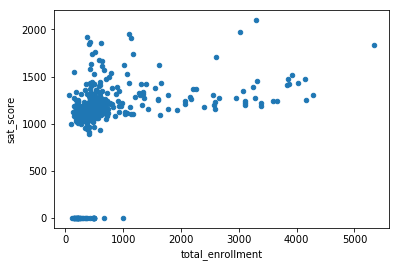

In [86]:
# Exploring enrollment and SAT scores


%matplotlib inline
full.plot.scatter(x='total_enrollment', y='sat_score')

In [87]:
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]


75       INTERNATIONAL COMMUNITY HIGH SCHOOL
103          BRONX INTERNATIONAL HIGH SCHOOL
116    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
118    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
153            HIGH SCHOOL OF WORLD CULTURES
162       BROOKLYN INTERNATIONAL HIGH SCHOOL
169                      FOUNDATIONS ACADEMY
193    INTERNATIONAL HIGH SCHOOL AT PROSPECT
205               IT TAKES A VILLAGE ACADEMY
217                MULTICULTURAL HIGH SCHOOL
246    PAN AMERICAN INTERNATIONAL HIGH SCHOO
327                                      NaN
336                                      NaN
346                                      NaN
347                                      NaN
349                                      NaN
351                                      NaN
352                                      NaN
353                                      NaN
361                                      NaN
362                                      NaN
364                                      NaN
368       

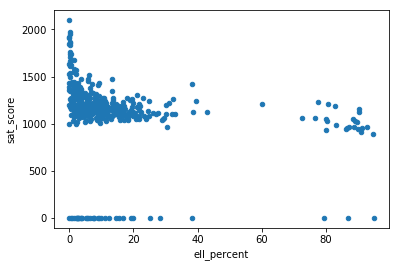

In [88]:
# Exploring English language learners and SAT scores

full.plot.scatter(x='ell_percent', y='sat_score')


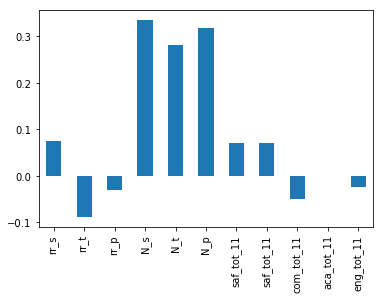

In [89]:
#Correlating survey scores and SAT scores

full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()


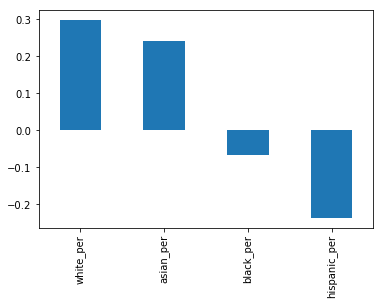

In [90]:
# Exploring race and SAT scores

full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()


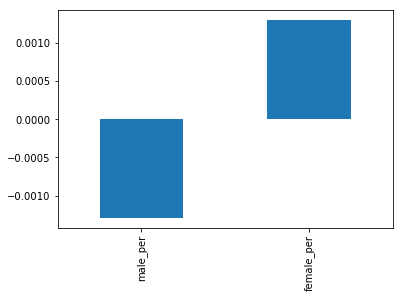

In [91]:
#Gender differences in SAT scores

full.corr()['sat_score'][['male_per','female_per']].plot.bar()

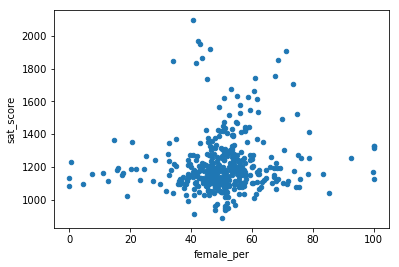

In [92]:
full[full['sat_score'] > 0].plot.scatter(x='female_per',y='sat_score')


In [93]:
full[(full['sat_score'] > 1400) & (full['female_per'] > 65)]['school_name']


5                         Bard High School Early College
18              Professional Performing Arts High School
22                         Eleanor Roosevelt High School
33                          Talent Unlimited High School
51     Fiorello H. LaGuardia High School of Music & A...
261                          Townsend Harris High School
290         Frank Sinatra School of the Arts High School
Name: school_name, dtype: object

In [94]:
# AP scores

full['ap_avg'] = full['AP Test Takers '] / full['total_enrollment']

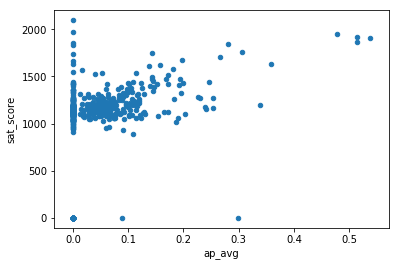

In [95]:
full.plot.scatter(x='ap_avg', y='sat_score')


In [96]:
full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["School Name"]


22             ELEANOR ROOSEVELT HIGH SCHOOL
132    HIGH SCHOOL OF AMERICAN STUDIES AT LE
261              TOWNSEND HARRIS HIGH SCHOOL
279    QUEENS HIGH SCHOOL FOR THE SCIENCES A
303      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object